# ML Course 2 - Practice 
> ###### By Vivien Bogne Tienoue

## Subject

We provide here a data set on the customers of a bank:
- CustomerId = customer id in the information system of the bank
- Surname = surname of the customer
- CreditScore = score attributed by the bank as estimation of capacity to reimburse a loan
- Geography = country of the customer
- Gender = sex of the customer
- Age = age of the customer
- Tenure = loan duration (year)
- Balance = amount of money on main account (\$)
- NumOfProducts = number of products the customer has in the banl
- HasCrCard = tells if the customer owns a credit card
- IsActiveMember = tells if the customer has an active account
- EstimatedSalary = estimated salary of the customer (\$)
- Exited = tells if the customer has left the bank

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

import pandas as pd
import sklearn 


In [2]:
dataset_raw = pd.read_csv('bank_churn.csv')
dataset_raw.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


The objective of the bank is to predict the churn, i.e. if a customer is likely to leave the bank, based on her profile (estimated salary, geography, age, etc.).
Here, we will prepare the data set so that it can be directly used for ML processing. The work is limited to data exploration and preparation, we will not make ML prediction yet.

Your tasks:
- Make some data exploration with at least three plots of your choice (3 points)
- Prepare the data set (7 points)

# 1. Data Exploration

## 1.1. Basic informations

### 1.1.1. Number of Records, missing values and dtypes

In [3]:
dataset_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


The data has :
- 10000 rows meaning 10 000 clients,
- 14 columns,
- 0 missing values, 
- 2 floats, 9 int64 and 3 object

### 1.1.2. Number of unique values


In [4]:
dataset_raw.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

Amongst 10 000 client (customerId) :
- 2932 unique surnames are available. Some client have the same Surname.
- "Boolean" characteristics have 2 values ( Gender, HasCrcard, IsActiveMember, Exited)
- The number of unique values for the other columns are listed also

## 1.2. Some numerical Summaries

In [5]:
dataset_raw.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


- The Credit Score average 38.9218 with a standard deviation around 96.65. More over its range is from 350 to 850 with most of the client Credit score average between 584 and 718
- Average Age of client is 38.9218 with a standard deviation around 10.5. Most of the client are above 32 years old and under 44 years old. The range of the age is from 18 to 92.
- Clients have an average loan duration of 5 years and 2 years of standard deviation. Most of the duration are between 3 and 7 years and the range of the loan duration is from 0 to 10.
- The range of the balance of the client is from 0 to around 250899 with an average of 76486. Most of the client have their balance under 127644.24.


## 1.3. Visualisation and understanding of the data

### 1.3.1. Univariate 

Let us analyse features independently.

In [6]:
def annotate_pct(ax):
    '''
    This function annotate bar plot by adding the count on each bar
    '''
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')


#### - Categorical

>##### Geography, Gender, NumOfProducts, HasCreditCard, IsActiveMember 

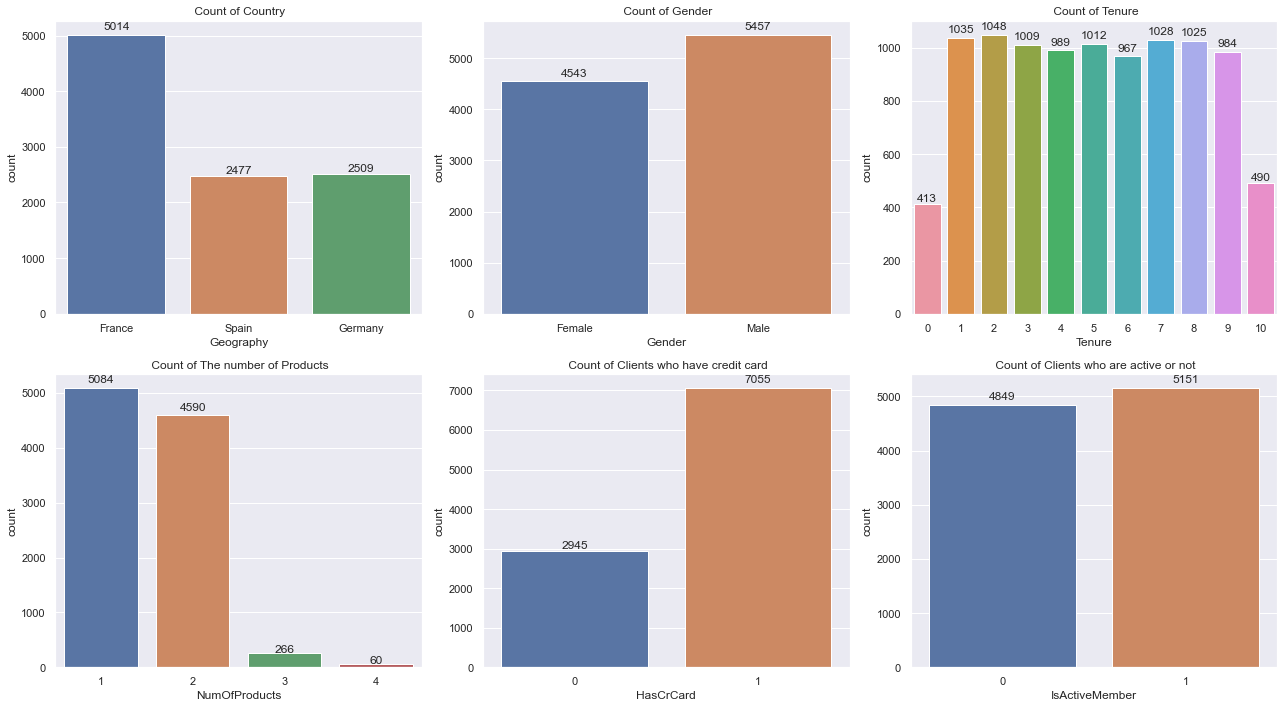

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18,10))
sns.countplot(x='Geography', data = dataset_raw, ax = axes[0,0])
annotate_pct(axes[0, 0])
axes[0, 0].set_title(' Count of Country')

sns.countplot(x='Gender', data = dataset_raw, ax = axes[0,1])
annotate_pct(axes[0, 1])
axes[0, 1].set_title(' Count of Gender')

sns.countplot(x='Tenure', data = dataset_raw, ax = axes[0,2])
annotate_pct(axes[0, 2])
axes[0, 2].set_title(' Count of Tenure')

sns.countplot(x='NumOfProducts', data = dataset_raw, ax = axes[1,0])
annotate_pct(axes[1, 0])
axes[1, 0].set_title(' Count of The number of Products')

sns.countplot(x='HasCrCard', data = dataset_raw, ax = axes[1,1])
annotate_pct(axes[1, 1])
axes[1, 1].set_title(' Count of Clients who have credit card')

sns.countplot(x='IsActiveMember', data = dataset_raw, ax = axes[1,2])
annotate_pct(axes[1, 2])
axes[1, 2].set_title(' Count of Clients who are active or not')

plt.tight_layout()
plt.show()

>#### Proportion of Churn Customer

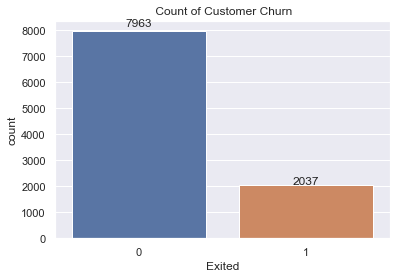

In [8]:
# And the target
fig, ax = plt.subplots()
sns.countplot(x='Exited', data = dataset_raw, ax=ax)
annotate_pct(ax)
ax.set_title(' Count of Customer Churn')

plt.show()

>##### Top 20 Surname Frequency
>The number of Surname is too high to print all the frequency that is why we display the top 20.
>Even though the surname of a customer has no impact on their decision to leave the bank.


In [9]:
def plot_top20(df, col):
    stats = df[[col, 'Exited']].groupby(col).agg(['count'])
    stats = stats.reset_index()
    stats.columns = [col, 'count']
    stats = stats.sort_values('count', ascending=False)
    fig = plt.subplots(figsize=(15,4))
    plt.bar(stats[col].astype(str).values[0:20], stats['count'].values[0:20])
    plt.xticks(rotation='vertical')
    plt.ylabel('Frequency')
    plt.xlabel(col)
    plt.title('Top20 ' + col + 's based on frequency')

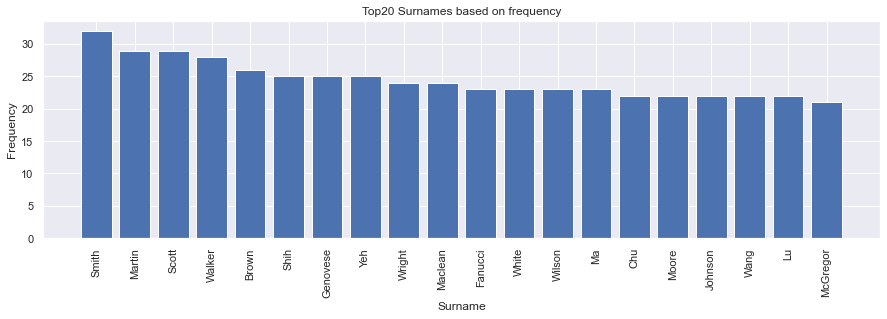

In [10]:
plot_top20(dataset_raw, 'Surname')

#### - Numerical 

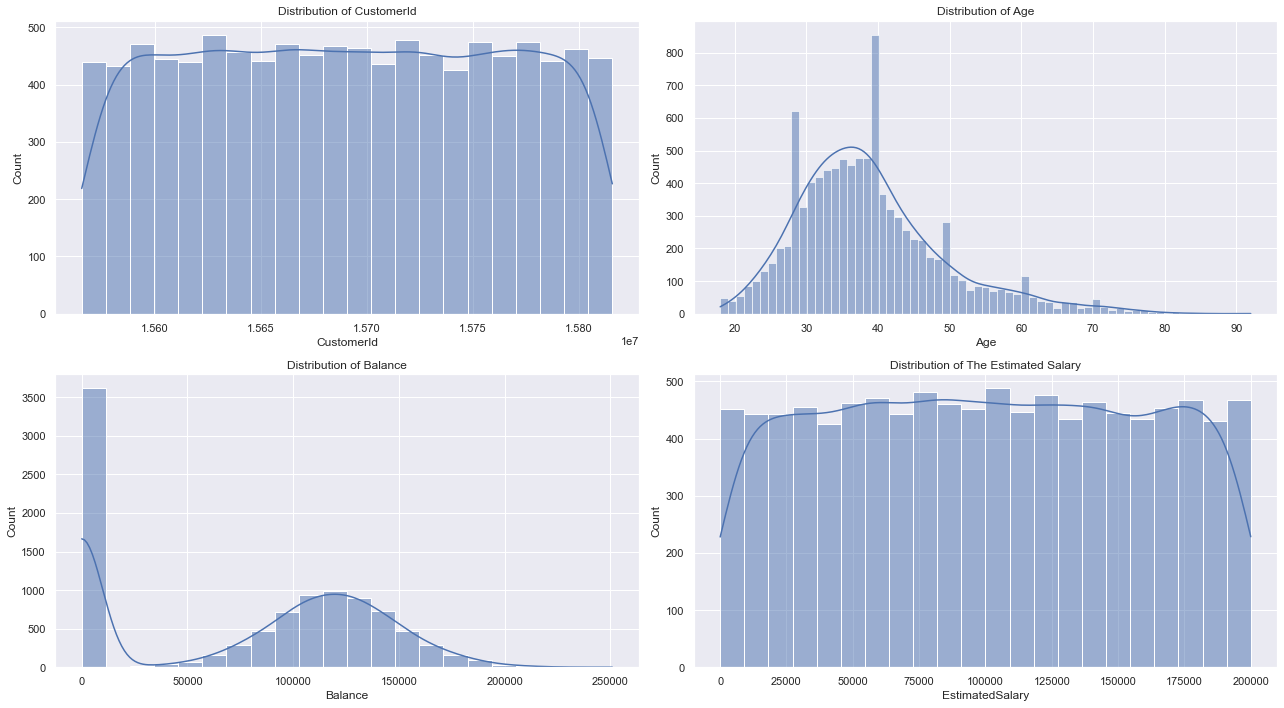

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18,10))
sns.histplot(x='CustomerId', data = dataset_raw, ax = axes[0,0], kde = True)
axes[0, 0].set_title('Distribution of CustomerId')

sns.histplot(x='Age', data = dataset_raw, ax = axes[0,1], kde = True)
axes[0, 1].set_title('Distribution of Age')


sns.histplot(x='Balance', data = dataset_raw, ax = axes[1,0], kde = True)
axes[1, 0].set_title('Distribution of Balance')

sns.histplot(x='EstimatedSalary', data = dataset_raw, ax = axes[1,1], kde = True)
axes[1, 1].set_title('Distribution of The Estimated Salary')

plt.tight_layout()
plt.show()

- CustomerId is not relevant
- It seems they are outliers in the age and Balance.

### 1.3.2. Multivariate

#### - Dependance between numerical column

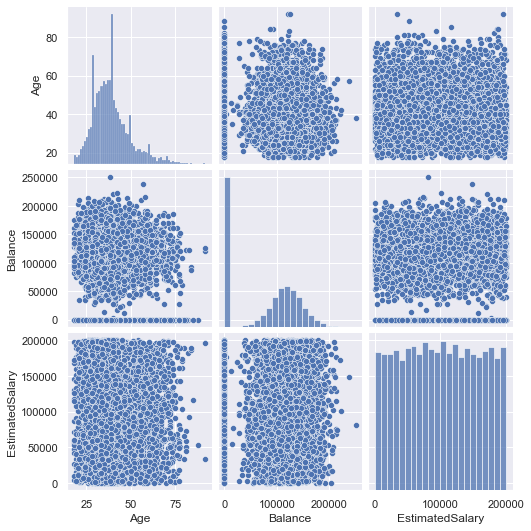

In [12]:
# Let us see the scatter plot between them
sns.pairplot(dataset_raw[['Age', 'Balance', 'EstimatedSalary']])
plt.show()

> They seems not dependant so we will use them as features

#### - Distribution of some numerical value ( Age, Balance and EstimatedSalary ) depending on Churn customer

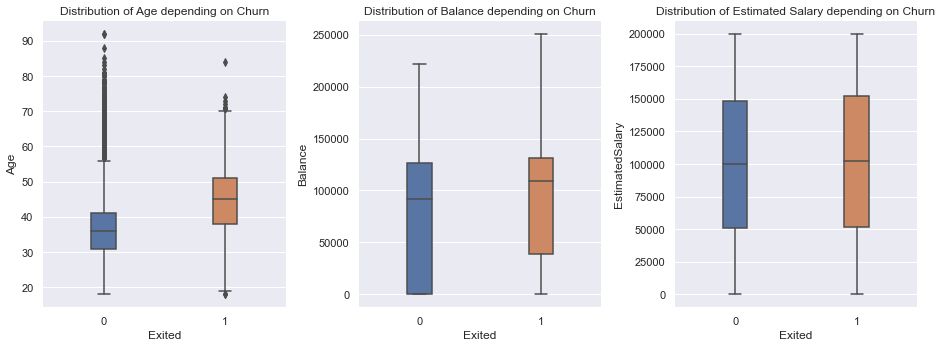

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(13,5))

sns.boxplot(y='Age', x='Exited', data = dataset_raw, width = 0.2, ax = axes[0])
axes[0].set_title('Distribution of Age depending on Churn')

sns.boxplot(y='Balance', x='Exited', data = dataset_raw, width = 0.2, ax = axes[1])
axes[1].set_title('Distribution of Balance depending on Churn')

sns.boxplot(y='EstimatedSalary', x='Exited', data = dataset_raw, width = 0.2, ax = axes[2])
axes[2].set_title('Distribution of Estimated Salary depending on Churn')

sns.despine(left=True)

plt.tight_layout()
plt.show()

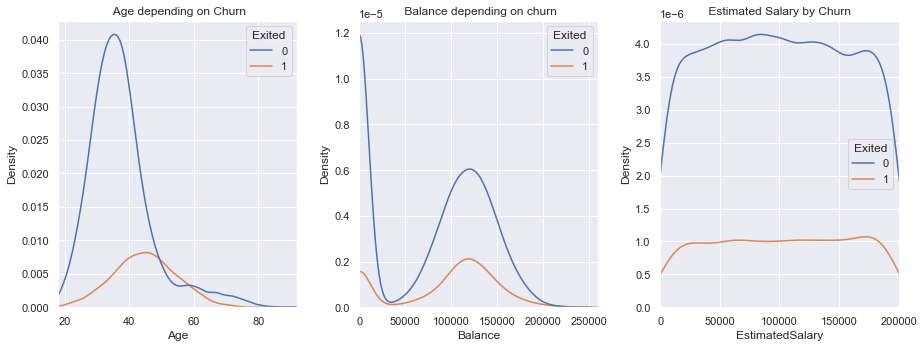

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(13,5))

sns.kdeplot(data=dataset_raw, x="Age", hue="Exited", ax= axes[0])
axes[0].set_title(' Age depending on Churn')
axes[0].set_xlim(18,92) # According to the range shown above 

sns.kdeplot(data=dataset_raw, x="Balance", hue="Exited", ax= axes[1])
axes[1].set_title(' Balance depending on churn')
axes[1].set_xlim(0,260000) # According to the range shown above 

sns.kdeplot(data=dataset_raw, x="EstimatedSalary", hue="Exited", ax = axes[2])
axes[2].set_title(' Estimated Salary by Churn ')
axes[2].set_xlim(0,200000) # According to the range shown above 


plt.tight_layout()
plt.show()

### - Repartition of Exit status with respect to categorical variable ( Gender, Geography, Tenure etc.) 

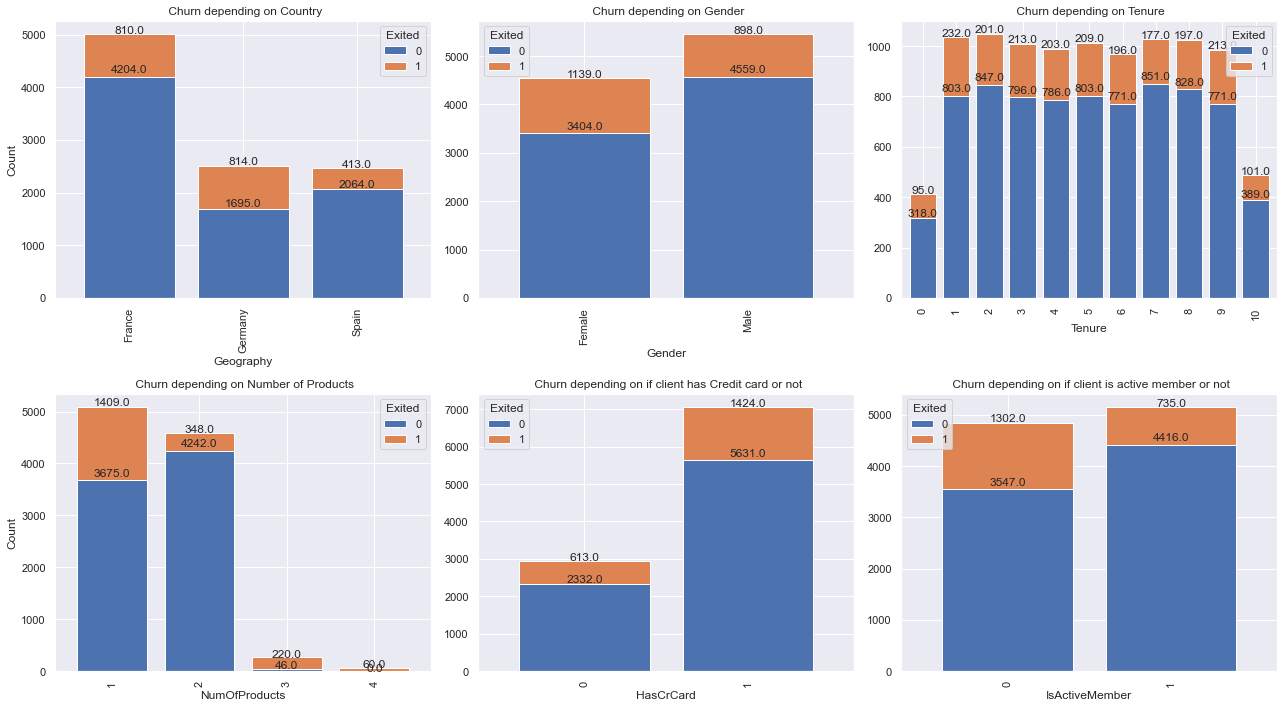

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18,10))

exit_vs_geography = dataset_raw.groupby(['Exited','Geography']).size().reset_index().pivot(index='Geography', columns='Exited', values=0)
exit_vs_geography.plot(kind='bar', stacked=True, width=0.8,  ax = axes[0, 0])
axes[0, 0].set_ylabel('Count')
annotate_pct(axes[0, 0])
axes[0, 0].set_title(' Churn depending on Country')


exit_vs_gender = dataset_raw.groupby(['Exited','Gender']).size().reset_index().pivot(index='Gender', columns='Exited', values=0)
exit_vs_gender.plot(kind='bar', stacked=True, width=0.8,  ax = axes[0, 1])
annotate_pct(axes[0, 1])
axes[0, 1].set_title(' Churn depending on Gender')

exit_vs_tenure = dataset_raw.groupby(['Exited','Tenure']).size().reset_index().pivot(index='Tenure', columns='Exited', values=0)
exit_vs_tenure.plot(kind='bar', stacked=True, width=0.8,  ax = axes[0, 2])
annotate_pct(axes[0, 2])
axes[0, 2].set_title(' Churn depending on Tenure')

exit_vs_numOfProd = dataset_raw.groupby(['Exited','NumOfProducts']).size().reset_index().pivot(index='NumOfProducts', columns='Exited', values=0)
exit_vs_numOfProd.plot(kind='bar', stacked=True, width=0.8,  ax = axes[1, 0])
axes[1, 0].set_ylabel('Count')
annotate_pct(axes[1, 0])
axes[1, 0].set_title(' Churn depending on Number of Products')

exit_vs_HasCrCard = dataset_raw.groupby(['Exited','HasCrCard']).size().reset_index().pivot(index='HasCrCard', columns='Exited', values=0)
exit_vs_HasCrCard.plot(kind='bar', stacked=True, width=0.8,  ax = axes[1, 1])
annotate_pct(axes[1, 1])
axes[1, 1].set_title(' Churn depending on if client has Credit card or not')

exit_vs_IsActiveMember = dataset_raw.groupby(['Exited','IsActiveMember']).size().reset_index().pivot(index='IsActiveMember', columns='Exited', values=0)
exit_vs_IsActiveMember.plot(kind='bar', stacked=True, width=0.8,  ax = axes[1, 2])
annotate_pct(axes[1, 2])
axes[1, 2].set_title(' Churn depending on if client is active member or not')


plt.tight_layout()
plt.show()


In [16]:
correlation = dataset_raw.corr()
correlation

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


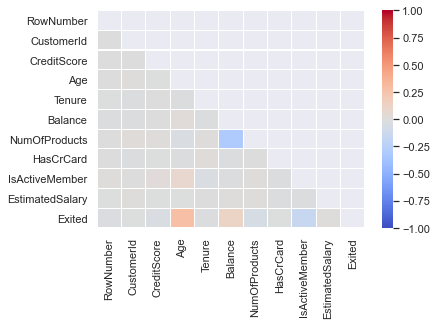

In [17]:
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(correlation,
            vmin=-1,
            vmax=1,
            cmap='coolwarm',
            mask = mask,
            linewidths=0.1)
plt.show()

> The most correlated columns to the Churn are: Age, IsActiveMember, Balance.

# 2. Prepare the data

## 2.1. Remove unrelevant data

### 2.1.1. Duplicate rows

In [18]:
dataset_raw.duplicated().sum()

0

> No duplicate rows

### 2.1.2. Dropping some columns

In [19]:
dataset_raw.columns.tolist()

['RowNumber',
 'CustomerId',
 'Surname',
 'CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

- RowNumber seems not relevant for us because it is just similar to the index +1. **The correlation shown above is close to 0 (-0.01 )**
- CustomerId also seems unrelevant because it is just a randomn number for each client. **The correlation shown above is very close to 0 (-0.006 )**
- Event though one assume that the surname is relevant we will not use them as features and then only focus to the caracteristics of the client.

> So we will drop those 3 columns. <br>
> For a first model, We won't drop the others columns that are also low correlated because they seems relevant.

In [20]:
dataset = dataset_raw.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
dataset.sample(n=5, random_state = 20)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9957,633,France,Male,25,1,0.00,1,1,0,100598.98,0
1687,850,Spain,Male,37,4,137204.77,1,1,1,28865.59,0
2116,701,France,Male,44,7,0.00,2,1,0,23425.78,0
231,610,France,Male,40,0,0.00,2,1,0,62232.60,0
2780,778,Spain,Male,40,8,104291.41,2,1,1,117507.11,0


### 2.1.3. Checking values that shouldn't be negative

In [21]:
columns_to_check_num_value = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
(dataset[columns_to_check_num_value] < 0).sum()

CreditScore        0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

## 2.2. Prepare features and response


### 2.2.1. Response:

In [22]:
y = dataset['Exited']
print(y[:6])

0    1
1    0
2    1
3    0
4    0
5    1
Name: Exited, dtype: int64


### 2.2.2. Features:

In [23]:
X = dataset.drop('Exited', axis=1)
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


### 2.2.3. Data encoding

#### - Label encoding for a boolean data:

Only Gender is not already numerical. (Amongst Gender, HasCrcard, IsActiveMember, Exited)

In [24]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(X['Gender'])
X['Gender'] = label_encoder.transform(X['Gender'])
print(X[:6])

   CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France       0   42       2       0.00              1   
1          608     Spain       0   41       1   83807.86              1   
2          502    France       0   42       8  159660.80              3   
3          699    France       0   39       1       0.00              2   
4          850     Spain       0   43       2  125510.82              1   
5          645     Spain       1   44       8  113755.78              2   

   HasCrCard  IsActiveMember  EstimatedSalary  
0          1               1        101348.88  
1          0               1        112542.58  
2          1               0        113931.57  
3          0               0         93826.63  
4          1               1         79084.10  
5          1               0        149756.71  


#### - One hot encoder for a categorical data:

In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
oh_encoder = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['Geography'])], remainder='passthrough')
X = oh_encoder.fit_transform(X)
print(X[:6])

[[1.0000000e+00 0.0000000e+00 0.0000000e+00 6.1900000e+02 0.0000000e+00
  4.2000000e+01 2.0000000e+00 0.0000000e+00 1.0000000e+00 1.0000000e+00
  1.0000000e+00 1.0134888e+05]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 6.0800000e+02 0.0000000e+00
  4.1000000e+01 1.0000000e+00 8.3807860e+04 1.0000000e+00 0.0000000e+00
  1.0000000e+00 1.1254258e+05]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 5.0200000e+02 0.0000000e+00
  4.2000000e+01 8.0000000e+00 1.5966080e+05 3.0000000e+00 1.0000000e+00
  0.0000000e+00 1.1393157e+05]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 6.9900000e+02 0.0000000e+00
  3.9000000e+01 1.0000000e+00 0.0000000e+00 2.0000000e+00 0.0000000e+00
  0.0000000e+00 9.3826630e+04]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 8.5000000e+02 0.0000000e+00
  4.3000000e+01 2.0000000e+00 1.2551082e+05 1.0000000e+00 1.0000000e+00
  1.0000000e+00 7.9084100e+04]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 6.4500000e+02 1.0000000e+00
  4.4000000e+01 8.0000000e+00 1.1375578e+05 2.0000000

In [26]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.0,619.0,0.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88
1,0.0,0.0,1.0,608.0,0.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58
2,1.0,0.0,0.0,502.0,0.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57
3,1.0,0.0,0.0,699.0,0.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63
4,0.0,0.0,1.0,850.0,0.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.0,0.0,0.0,771.0,1.0,39.0,5.0,0.00,2.0,1.0,0.0,96270.64
9996,1.0,0.0,0.0,516.0,1.0,35.0,10.0,57369.61,1.0,1.0,1.0,101699.77
9997,1.0,0.0,0.0,709.0,0.0,36.0,7.0,0.00,1.0,0.0,1.0,42085.58
9998,0.0,1.0,0.0,772.0,1.0,42.0,3.0,75075.31,2.0,1.0,0.0,92888.52


### 2.2.4. Data set split

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [28]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7500, 12)
(2500, 12)
(7500,)
(2500,)


### 2.2.5. Scaling

We need to scale some columns that could impact the result of the model because of their high distribution.
That is : 
- CreditScore :column number 3
- Age : column number 5
- Balance : column number 7
- Tenure : column number 8
- EstimatedSalary : column number 11

In [29]:
# visualise the first 6 elts of the corresponding numpy array
X_train[:6, [3,5,6,7,8,11]]

array([[7.2000000e+02, 5.2000000e+01, 7.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 1.4781120e+04],
       [5.7700000e+02, 3.2000000e+01, 1.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 9.9023900e+03],
       [7.0600000e+02, 4.3000000e+01, 1.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 3.1962770e+04],
       [8.2400000e+02, 4.5000000e+01, 3.0000000e+00, 1.2920948e+05,
        1.0000000e+00, 6.0151770e+04],
       [4.9700000e+02, 3.2000000e+01, 8.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 6.7364420e+04],
       [7.3200000e+02, 4.6000000e+01, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 1.8435078e+05]])

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[:, [3,5,6,7,8,11]] = scaler.fit_transform(X_train[:, [3,5,6,7,8,11]])
X_test[:, [3,5,6,7,8,11]] = scaler.transform(X_test[:, [3,5,6,7,8,11]])

In [31]:
# Putting the X_train and X_test in a dataframe for a better visualisation.
# Then display a sample of 6 elts
display(pd.DataFrame(X_train).sample(6))
display(pd.DataFrame(X_test).sample(6))

,0,1,2,3,4,5,6,7,8,9,10,11
1363,1.0,0.0,0.0,-1.247790,1.0,-0.851098,-1.050875,0.637135,-0.910949,1.0,0.0,-0.429725
1241,0.0,1.0,0.0,-0.753272,0.0,-0.755313,-0.357289,-0.246584,-0.910949,1.0,1.0,0.785354
3090,0.0,1.0,0.0,-1.577469,0.0,1.543537,0.683089,0.885537,-0.910949,1.0,1.0,-1.564010
1453,1.0,0.0,0.0,-2.030777,1.0,-0.946883,0.336297,-1.228601,-0.910949,0.0,0.0,1.707984
3339,1.0,0.0,0.0,-0.279359,1.0,0.873039,-0.010496,0.672014,-0.910949,1.0,1.0,1.017026
2439,1.0,0.0,0.0,0.091530,0.0,1.639322,1.376675,0.757297,-0.910949,1.0,0.0,-0.009122


,0,1,2,3,4,5,6,7,8,9,10,11
2390,1.0,0.0,0.0,-1.000531,1.0,0.202541,-1.397668,-1.228601,0.800932,1.0,0.0,-0.163631
661,0.0,0.0,1.0,-0.588433,0.0,-0.084815,-0.357289,0.195006,0.800932,1.0,0.0,-0.573270
1372,1.0,0.0,0.0,1.533874,0.0,1.256181,-0.357289,1.357701,-0.910949,1.0,1.0,-0.190131
399,1.0,0.0,0.0,0.926029,0.0,1.160395,-0.357289,-1.228601,0.800932,1.0,1.0,1.370263
546,1.0,0.0,0.0,0.163647,0.0,-0.276386,1.029882,-1.228601,-0.910949,0.0,1.0,1.018359
1635,0.0,0.0,1.0,1.193893,1.0,0.202541,-1.744461,-1.228601,0.800932,0.0,1.0,-1.141809


# We are ready now for the Creation of the model